In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_data=pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
test_data=pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [4]:
training_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [6]:
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [7]:
print("Training Data: {}".format(training_data.shape))
print("Any Null Values In the Training Data: {}".format(training_data.isnull().values.any()))

print("Test Data: {}".format(test_data.shape))
print("Any Null Values In the Test Data: {}".format(test_data.isnull().values.any()))

Training Data: (7352, 563)
Any Null Values In the Training Data: False
Test Data: (2947, 563)
Any Null Values In the Test Data: False


In [8]:
X_train=training_data.iloc[:,:-2]
y_train=training_data.iloc[:,-1]

X_test=test_data.iloc[:,:-2]
y_test=test_data.iloc[:,-1]

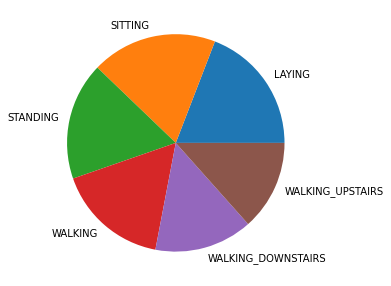

In [9]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())
plt.figure(figsize=(15,5))
plt.pie(Category_count,labels=activity);

In [10]:
acc=0
gyro=0
others=0
for column in training_data.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1
        

In [11]:
print(acc,gyro,others)

345 213 5


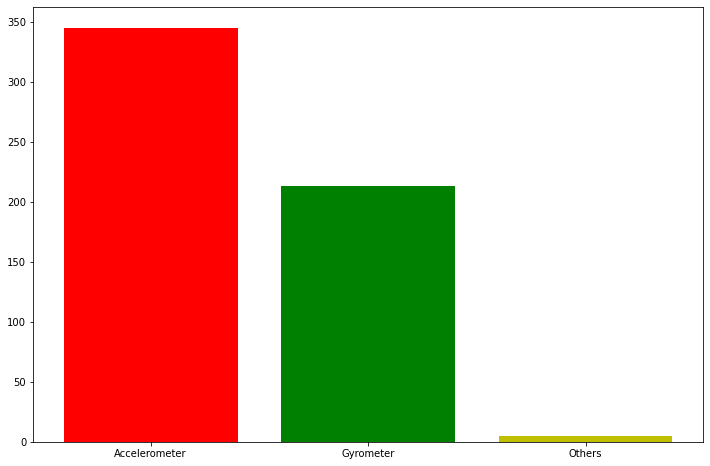

In [12]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['r','g','y']);

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [15]:
y_train

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [17]:
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(X_train,y_train,batch_size=256,epochs=22,validation_data=(X_test,y_test))

Epoch 1/22
29/29 [==============================] - 0s 11ms/step - loss: 1.5498 - accuracy: 0.4844 - val_loss: 1.0743 - val_accuracy: 0.5022
Epoch 2/22
29/29 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.7031 - val_loss: 0.4183 - val_accuracy: 0.7944
Epoch 3/22
29/29 [==============================] - 0s 5ms/step - loss: 0.2264 - accuracy: 0.9192 - val_loss: 0.1927 - val_accuracy: 0.9345
Epoch 4/22
29/29 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9778 - val_loss: 0.1722 - val_accuracy: 0.9433
Epoch 5/22
29/29 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.1594 - val_accuracy: 0.9508
Epoch 6/22
29/29 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.1448 - val_accuracy: 0.9532
Epoch 7/22
29/29 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9948 - val_loss: 0.1629 - val_accuracy: 0.9528
Epoch 8/22
29/29 [=

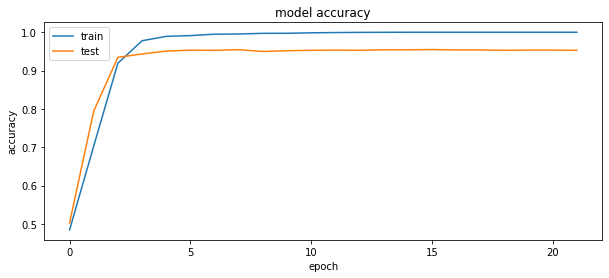

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred=model.predict(X_test)

In [23]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [24]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5])

In [25]:
y_pred_class

array([2, 2, 2, ..., 5, 5, 5])

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)

In [27]:
cm

array([[519,   5,  13,   0,   0,   0],
       [  0, 433,  57,   0,   0,   1],
       [  0,  10, 522,   0,   0,   0],
       [  0,   0,   0, 495,   1,   0],
       [  0,   0,   0,   7, 396,  17],
       [  0,   0,   0,  24,   4, 443]])

In [28]:
accuracy

0.9528333898880217